# Load & clean data

In [1]:
import pandas as pd
df = pd.read_excel('Ordinal_Logistic_Crime by division.xlsx',sheet_name='Master')

In [2]:
df = df.drop(columns=['Unique timing','# Crime'])
df = pd.get_dummies(df, columns=['Division','OCC_DOW','OCC_MONTH','Hour_new','Rain','Snow'],drop_first=True)

In [3]:
# Create the training dataset
train_data = df[(df['OCC_YEAR'] >= 2017) & (df['OCC_YEAR'] <= 2020)]

# Create the test dataset
test_data = df[(df['OCC_YEAR'] >= 2021) & (df['OCC_YEAR'] <= 2022)]

In [4]:
train_data = train_data.drop(columns=['OCC_YEAR'])
test_data = test_data.drop(columns=['OCC_YEAR'])
y_train = train_data['Crime']
X_train = train_data.drop(columns=['Crime'])
y_test = test_data['Crime']
X_test = test_data.drop(columns=['Crime'])

In [5]:
class_distribution = train_data['Crime'].value_counts()
print(class_distribution)

Crime
1    16103
2     4297
3     1523
Name: count, dtype: int64


In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

LOGISTIC REGRESSION OneVsRest

In [7]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
model = LogisticRegression(penalty="l2", C=1e42, solver='newton-cg')
ovr = OneVsRestClassifier(model)
ovr.fit(X_resampled, y_resampled)

OneVsRestClassifier(estimator=LogisticRegression(C=1e+42, solver='newton-cg'))

In [8]:
from dmba import classificationSummary
classificationSummary(y_resampled, ovr.predict(X_resampled))
classificationSummary(y_test, ovr.predict(X_test))

Confusion Matrix (Accuracy 0.6304)

       Prediction
Actual     0     1     2
     0 15811     5   287
     1  6061  3635  6407
     2  2872  2225 11006
Confusion Matrix (Accuracy 0.7631)

       Prediction
Actual    0    1    2
     0 6820    4  127
     1 1516    1   43
     2  432    2   20


C:\Users\leozh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


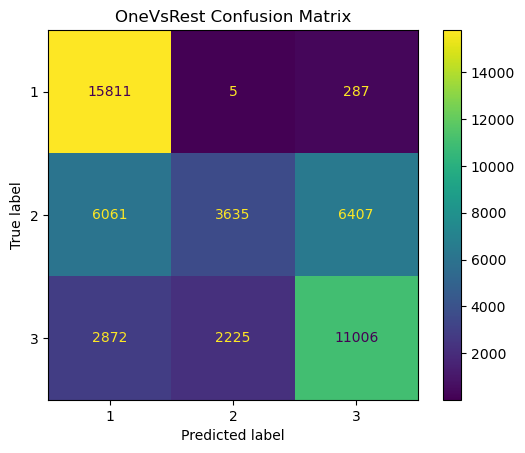

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# create confusion matrix for OneVsRest model
plot_confusion_matrix(ovr, X_resampled, y_resampled)
plt.title("OneVsRest Confusion Matrix")
plt.show()

C:\Users\leozh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


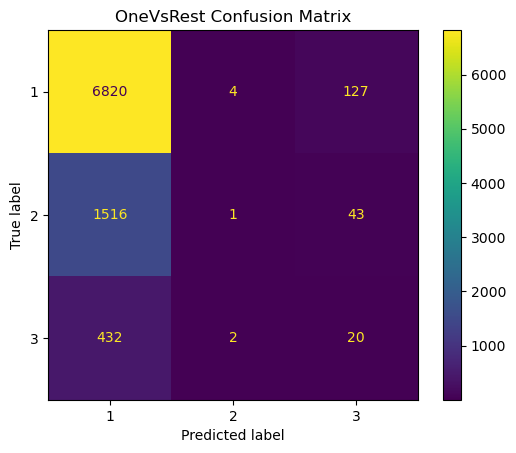

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# create confusion matrix for OneVsRest model
plot_confusion_matrix(ovr, X_test, y_test)
plt.title("OneVsRest Confusion Matrix")
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

def confusionMatrices(model, title):
    print(title + ' - training results')
    print(classification_report(y_train, model.predict(X_train)))
    print(title + ' - test results')
    test_pred = model.predict(X_test)
    print(classification_report(y_test, test_pred))
    return confusion_matrix(y_test, test_pred)

In [12]:
print(classification_report(y_resampled, ovr.predict(X_resampled)))
print(classification_report(y_test, ovr.predict(X_test)))

              precision    recall  f1-score   support

           1       0.64      0.98      0.77     16103
           2       0.62      0.23      0.33     16103
           3       0.62      0.68      0.65     16103

    accuracy                           0.63     48309
   macro avg       0.63      0.63      0.59     48309
weighted avg       0.63      0.63      0.59     48309

              precision    recall  f1-score   support

           1       0.78      0.98      0.87      6951
           2       0.14      0.00      0.00      1560
           3       0.11      0.04      0.06       454

    accuracy                           0.76      8965
   macro avg       0.34      0.34      0.31      8965
weighted avg       0.63      0.76      0.68      8965



In [13]:
from dmba import regressionSummary
display(regressionSummary(y_resampled, ovr.predict(X_resampled)))
display(regressionSummary(y_test, ovr.predict(X_test)))


Regression statistics

                      Mean Error (ME) : 0.1458
       Root Mean Squared Error (RMSE) : 0.7522
            Mean Absolute Error (MAE) : 0.4350
          Mean Percentage Error (MPE) : 3.9420
Mean Absolute Percentage Error (MAPE) : 19.6016


None


Regression statistics

                      Mean Error (ME) : 0.2321
       Root Mean Squared Error (RMSE) : 0.6511
            Mean Absolute Error (MAE) : 0.2993
          Mean Percentage Error (MPE) : 8.5574
Mean Absolute Percentage Error (MAPE) : 14.7927


None

ORDINAL REGRESSION - LogisticAT

In [14]:
from mord import LogisticAT

In [15]:
regressor_2 = LogisticAT(alpha=1.0, verbose=0)
regressor_2.fit(X_resampled, y_resampled)

LogisticAT()

In [16]:
#regressor_3 = LogisticAT(alpha=1.0, verbose=0)
#regressor_3.fit(X_test, y_test)

In [17]:
classificationSummary(y_resampled, regressor_2.predict(X_resampled))
classificationSummary(y_test, regressor_2.predict(X_test))
#classificationSummary(y_test, regressor_3.predict(X_test))

Confusion Matrix (Accuracy 0.5531)

       Prediction
Actual    0    1    2
     0 9726 6377    0
     1 3104 7597 5402
     2 1140 5566 9397
Confusion Matrix (Accuracy 0.5479)

       Prediction
Actual    0    1    2
     0 4156 2795    0
     1  804  756    0
     2  219  235    0


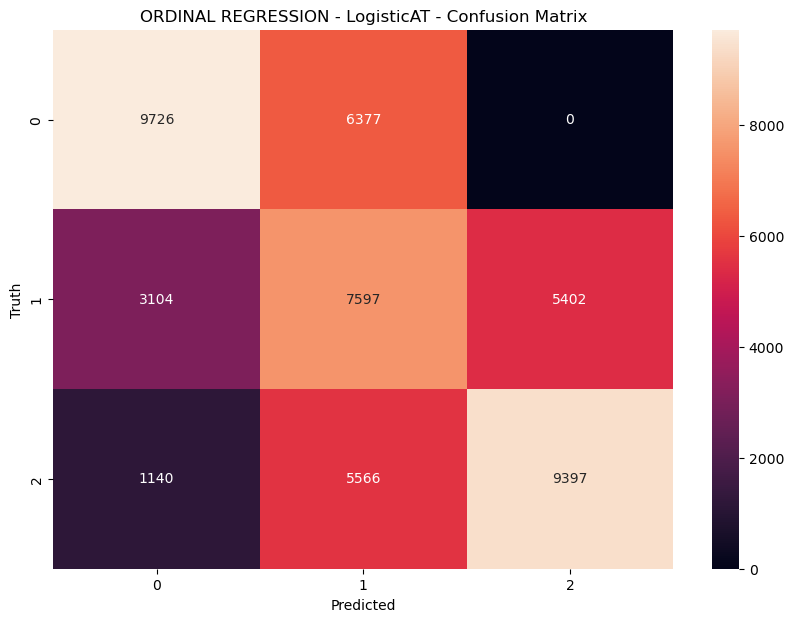

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# predict the class labels
y_pred_resampled = regressor_2.predict(X_resampled)

# create confusion matrix
cm = confusion_matrix(y_resampled, y_pred_resampled)

# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ORDINAL REGRESSION - LogisticAT - Confusion Matrix")
plt.show()


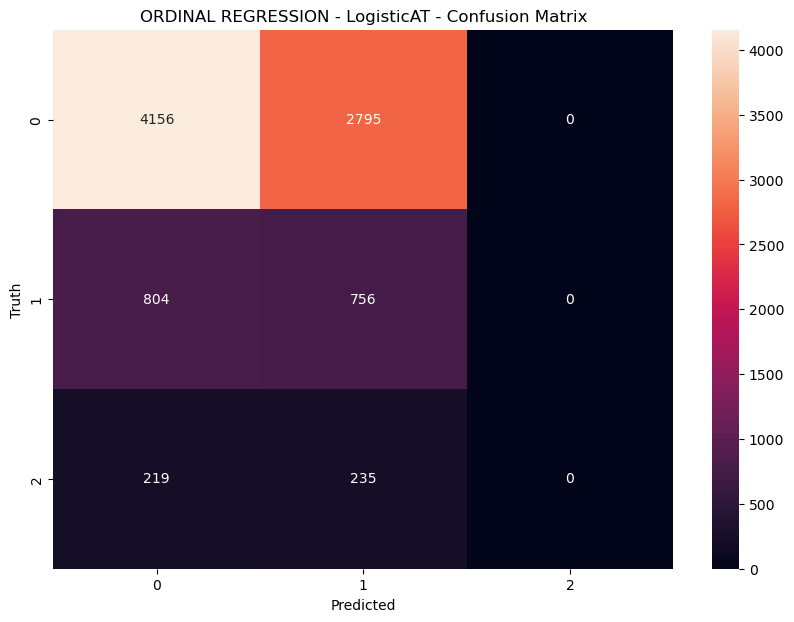

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# predict the class labels
y_pred_resampled = regressor_2.predict(X_test)
#y_pred_test = regressor_3.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ORDINAL REGRESSION - LogisticAT - Confusion Matrix")
plt.show()


In [20]:
display(regressionSummary(y_resampled, regressor_2.predict(X_resampled)))
display(regressionSummary(y_test, regressor_2.predict(X_test)))


Regression statistics

                      Mean Error (ME) : -0.0172
       Root Mean Squared Error (RMSE) : 0.7195
            Mean Absolute Error (MAE) : 0.4705
          Mean Percentage Error (MPE) : -10.1651
Mean Absolute Percentage Error (MAPE) : 27.4179


None


Regression statistics

                      Mean Error (ME) : -0.1470
       Root Mean Squared Error (RMSE) : 0.7248
            Mean Absolute Error (MAE) : 0.4765
          Mean Percentage Error (MPE) : -24.1904
Mean Absolute Percentage Error (MAPE) : 38.1632


None

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

def confusionMatrices(model, title):
    print(title + ' - training results')
    print(classification_report(y_train, model.predict(X_train)))
    print(title + ' - test results')
    test_pred = model.predict(X_test)
    print(classification_report(y_test, test_pred))
    return confusion_matrix(y_test, test_pred)

In [22]:
print(classification_report(y_resampled, regressor_2.predict(X_resampled)))
print(classification_report(y_test, regressor_2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.70      0.60      0.65     16103
           2       0.39      0.47      0.43     16103
           3       0.63      0.58      0.61     16103

    accuracy                           0.55     48309
   macro avg       0.57      0.55      0.56     48309
weighted avg       0.57      0.55      0.56     48309

              precision    recall  f1-score   support

           1       0.80      0.60      0.69      6951
           2       0.20      0.48      0.28      1560
           3       0.00      0.00      0.00       454

    accuracy                           0.55      8965
   macro avg       0.33      0.36      0.32      8965
weighted avg       0.66      0.55      0.58      8965



C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ORDINAL REGRESSION - OrdinalRidge 

In [23]:
from mord import OrdinalRidge

In [24]:
regressor = OrdinalRidge(alpha=1.0, max_iter=None, tol=0.001, solver='saga')
regressor.fit(X_resampled, y_resampled)

OrdinalRidge(solver='saga')

In [25]:
classificationSummary(y_resampled, regressor.predict(X_resampled))
classificationSummary(y_test, regressor.predict(X_test))

Confusion Matrix (Accuracy 0.4837)

       Prediction
Actual     0     1     2     3
     0     0     0     0     0
     1     8  5057 11038     0
     2     3  1510 11221  3369
     3     3   472  8541  7087
Confusion Matrix (Accuracy 0.3719)

       Prediction
Actual    0    1    2    3
     0    0    0    0    0
     1    8 2204 4739    0
     2    0  430 1130    0
     3    0  132  322    0


C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


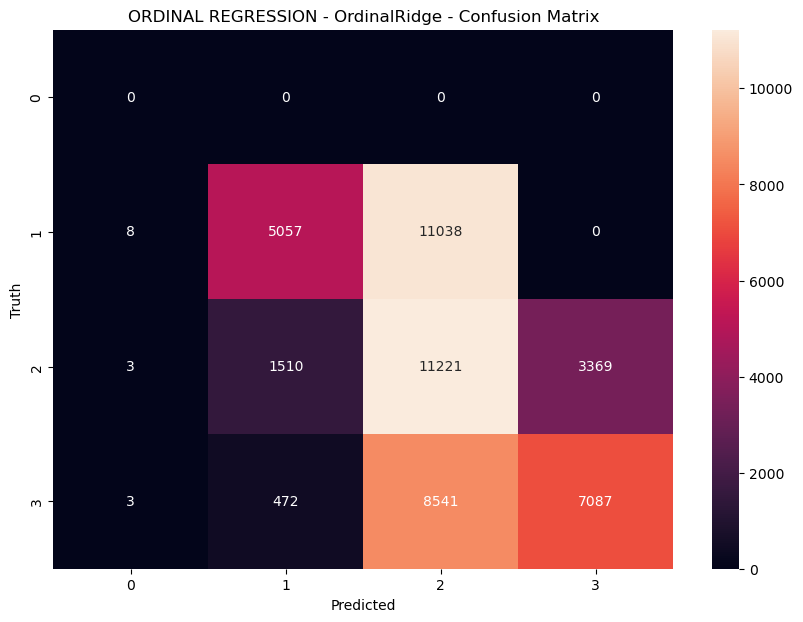

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# predict the class labels
y_pred_resampled = regressor.predict(X_resampled)

# create confusion matrix
cm = confusion_matrix(y_resampled, y_pred_resampled)

# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ORDINAL REGRESSION - OrdinalRidge - Confusion Matrix")
plt.show()

C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


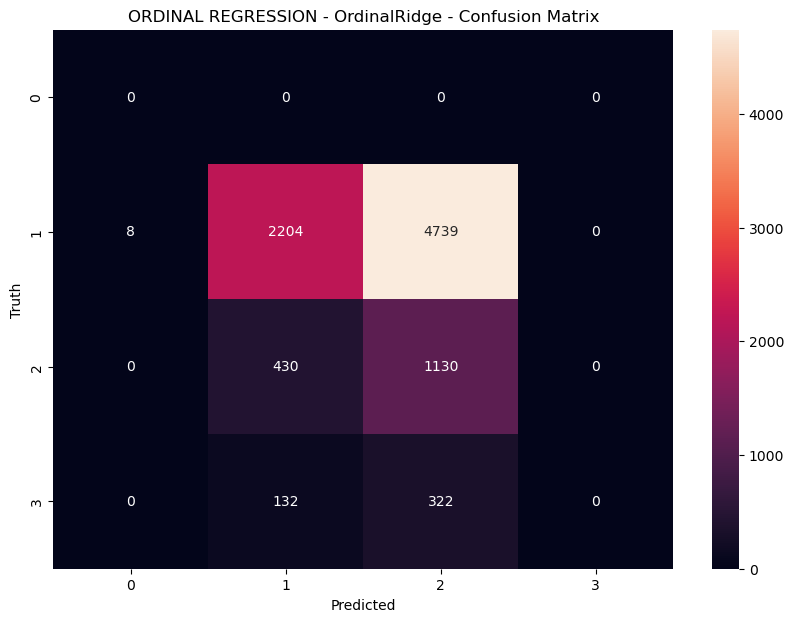

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# predict the class labels
y_pred_resampled = regressor.predict(X_test)
#y_pred_test = regressor_3.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_resampled)
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ORDINAL REGRESSION - OrdinalRidge - Confusion Matrix")
plt.show()

In [28]:
display(regressionSummary(y_resampled, regressor.predict(X_resampled)))
display(regressionSummary(y_test, regressor.predict(X_test)))

C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(



Regression statistics

                      Mean Error (ME) : -0.0702
       Root Mean Squared Error (RMSE) : 0.7391
            Mean Absolute Error (MAE) : 0.5263
          Mean Percentage Error (MPE) : -18.1992
Mean Absolute Percentage Error (MAPE) : 34.4722


None


Regression statistics

                      Mean Error (ME) : -0.4144
       Root Mean Squared Error (RMSE) : 0.8199
            Mean Absolute Error (MAE) : 0.6428
          Mean Percentage Error (MPE) : -48.1948
Mean Absolute Percentage Error (MAPE) : 57.5274


C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


None

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

def confusionMatrices(model, title):
    print(title + ' - training results')
    print(classification_report(y_train, model.predict(X_train)))
    print(title + ' - test results')
    test_pred = model.predict(X_test)
    print(classification_report(y_test, test_pred))
    return confusion_matrix(y_test, test_pred)

In [30]:
print(classification_report(y_resampled, regressor.predict(X_resampled)))
print(classification_report(y_test, regressor.predict(X_test)))

C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.72      0.31      0.44     16103
         2.0       0.36      0.70      0.48     16103
         3.0       0.68      0.44      0.53     16103

    accuracy                           0.48     48309
   macro avg       0.44      0.36      0.36     48309
weighted avg       0.59      0.48      0.48     48309

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.80      0.32      0.45      6951
         2.0       0.18      0.72      0.29      1560
         3.0       0.00      0.00      0.00       454

    accuracy                           0.37      8965
   macro avg       0.24      0.26      0.19      8965
weighted avg       0.65      0.37      0.40      8965



C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
C:\Users\leozh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

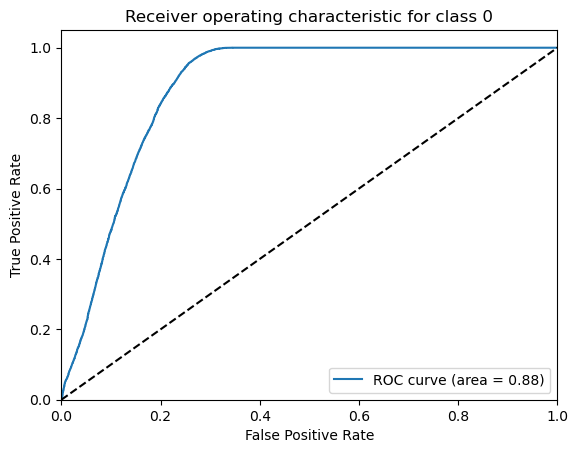

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_resampled, classes=np.unique(y_resampled))
y_score = ovr.decision_function(X_resampled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_resampled))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for class 0')
plt.legend(loc="lower right")
plt.show()

#### a model with an AUC of 0.88 is considered to have good predictive performance, as it indicates a high level of accuracy in classifying instances from the positive and negative classes.

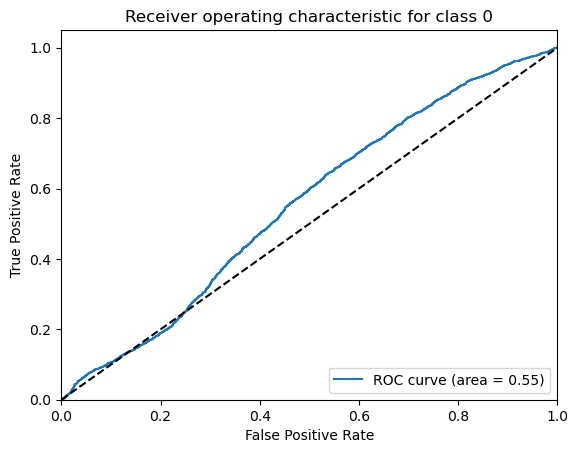

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = ovr.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for class 0')
plt.legend(loc="lower right")
plt.show()


#### model with an AUC of 0.56 is performing slightly better than random guessing, but it's not an excellent model. We may want to consider tuning your model, trying different algorithms, or gathering more data to improve its predictive performance.

#### Coefficient plot: If your goal is to interpret the effects of different predictors, you could visualize the coefficients of your model. This can give you an idea of which predictors are having the most influence on your model's predictions.

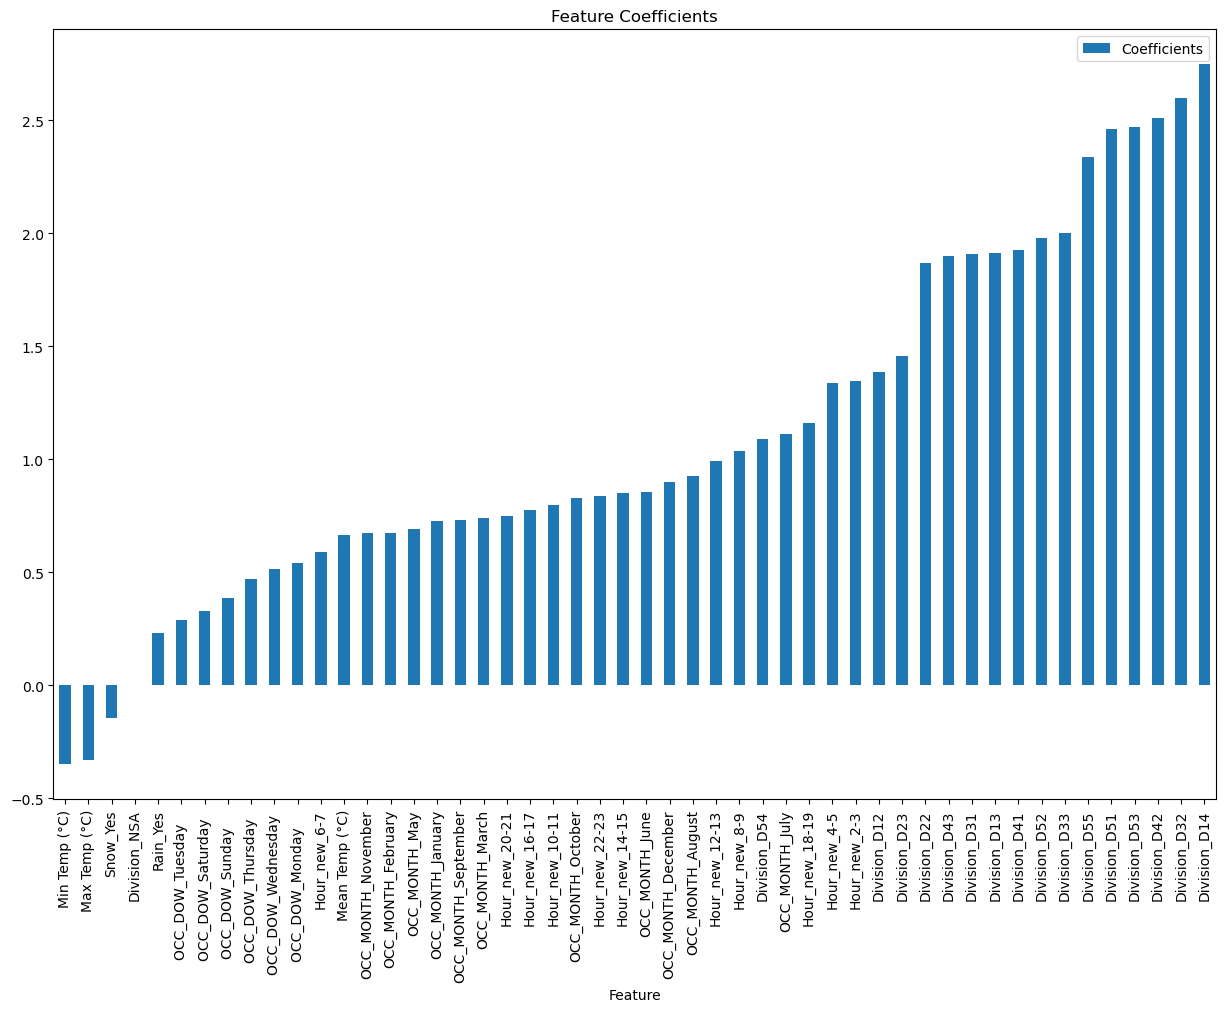

In [35]:
coefficients = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":np.transpose(regressor_2.coef_)})
coefficients = coefficients.sort_values(by='Coefficients')
coefficients.plot(x ='Feature', y='Coefficients', kind = 'bar', figsize=(15, 10))
plt.title('Feature Coefficients')
plt.show()

#### Learning Curve: A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

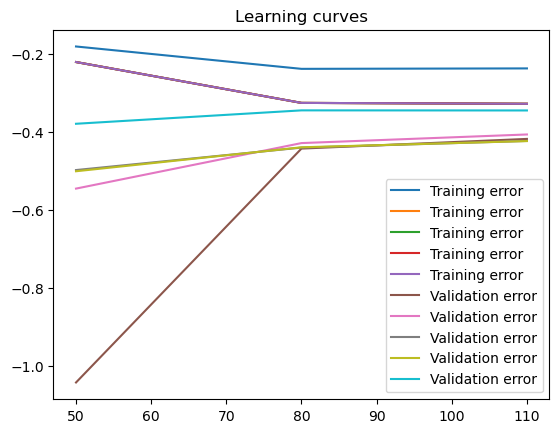

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(regressor_2, X_train, y_train, train_sizes=[50, 80, 110], cv=5)
plt.figure()
plt.plot(train_sizes, train_scores, label = 'Training error')
plt.plot(train_sizes, valid_scores, label = 'Validation error')
plt.title('Learning curves')
plt.legend()
plt.show()

#### Precision-Recall Curve: In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. You might want to use this when the classes are very imbalanced.

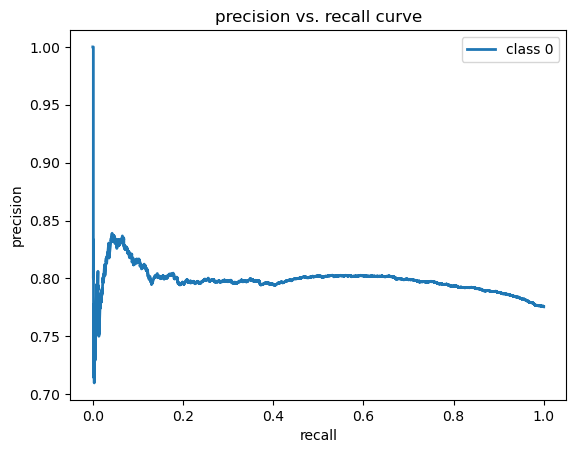

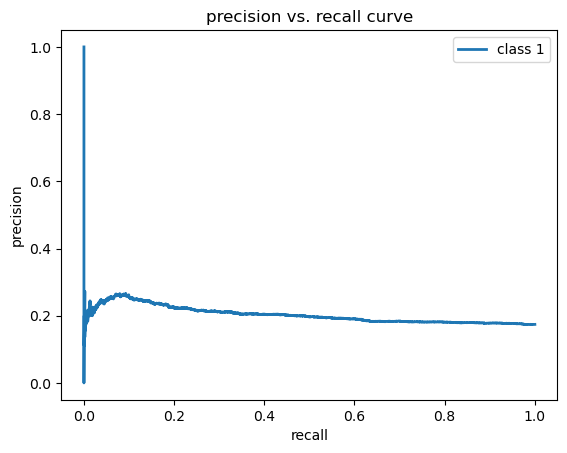

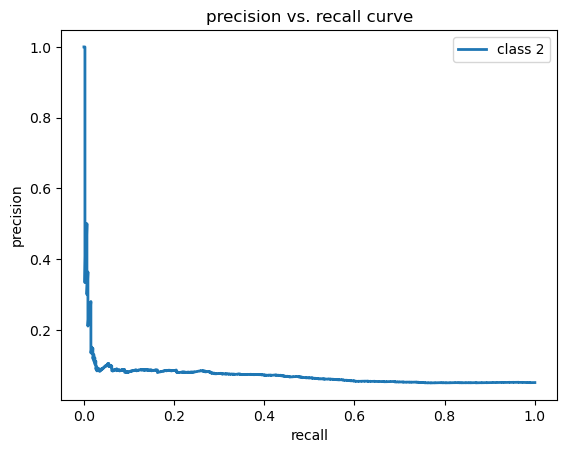

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_score are defined and correct

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = regressor_2.predict_proba(X_test)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()

for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])

    plt.figure()
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()


#### Histogram of Residuals: This plot can be used to visualize the distribution of the residuals/error of your model. The residuals should ideally follow a normal distribution.

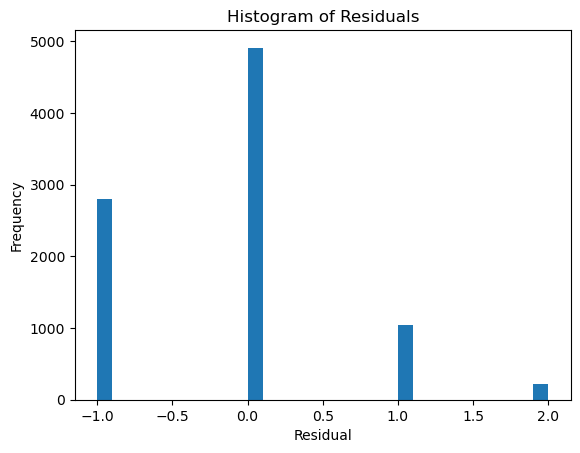

In [38]:
residuals = y_test - regressor_2.predict(X_test)
plt.hist(residuals, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
